<a href="https://colab.research.google.com/github/exord/UNSAM_IA/blob/master/BaseFunctionsNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from tensorflow import keras
import tensorflow

from matplotlib import pyplot as plt

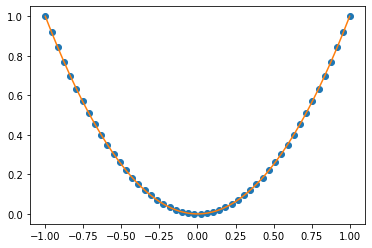

In [81]:
# Generar los datos (y la verdad de base)
x = np.linspace(-1, 1, 50)
xx = np.linspace(-1, 1, 300)

y = np.sin(np.pi * x)
yy = np.sin(np.pi * xx)

y = x**2
yy = xx**2

plt.plot(x, y, 'o')
plt.plot(xx, yy, '-')

In [0]:
# Reshape de todo
x_  = x.reshape((-1, 1))

In [0]:
modelo = keras.Sequential()
modelo.add(keras.layers.Dense(3, activation='tanh', input_shape=(1,)))
# modelo.add(keras.layers.Dense(10, activation='tanh'))
modelo.add(keras.layers.Dense(1, activation=None))

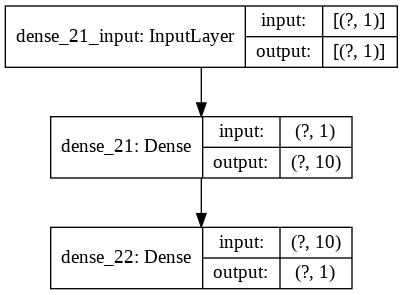

In [94]:
keras.utils.plot_model(modelo, show_shapes=True)

In [0]:
modelo.compile(optimizer=keras.optimizers.SGD(learning_rate=0.05), loss='mse')

In [124]:
modelo.fit(x_, y, epochs=250)

Epoch 1/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 2/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 3/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 4/250
2/2 [==============================] - 0s 6ms/step - loss: 0.0026
Epoch 5/250
2/2 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 6/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 7/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 8/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 9/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 10/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 12/250
2/2 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 13/250
2/2 [==============================] - 0s 2ms/st

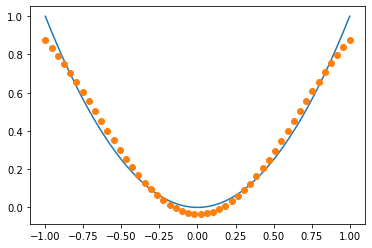

In [125]:
plt.plot(xx, yy)
plt.plot(x_, modelo.predict(x_), 'o')
# plt.plot(xx, modelo.predict(xx), label='prediction')

In [126]:
# Modificación del learning rate para seguir el entrenamiento.
from keras import backend as bb
bb.set_value(modelo.optimizer.learning_rate, 0.001)
hist = modelo.fit(x_, y, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 1ms/step - loss: 0.0019
Epoch 2/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 3/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 4/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 6/100
2/2 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 7/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 8/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 9/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 10/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 11/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 12/100
2/2 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 13/100
2/2 [==============================] - 0s 3ms/st

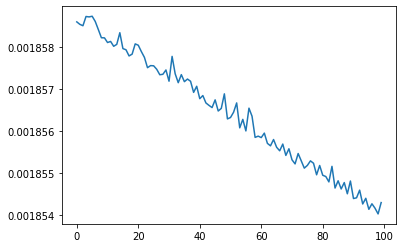

In [127]:
plt.plot(hist.history['loss'])

In [0]:
w, b = modelo.layers[0].get_weights()

In [99]:
print(w, b)

[[-0.7347091  -0.81533587 -0.58133864  0.02889532 -1.5148203   0.23817244
  -0.78820235  0.6132397   0.93194485 -0.4002664 ]] [ 0.27265045 -0.3677868  -0.10500507 -0.55722904  0.90748924 -0.25177255
  0.32632485  0.0177486   0.4761906   0.03488101]


In [100]:
modelo.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 10)                20        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 11        
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [101]:
w1, b1 = modelo.layers[1].get_weights()
print(w1, b1)

[[-0.29310188]
 [ 0.6566181 ]
 [ 0.27042237]
 [-0.8856804 ]
 [-1.2218598 ]
 [-0.6448398 ]
 [-0.39367595]
 [-0.1029956 ]
 [-0.6678113 ]
 [ 0.35156187]] [0.97963846]


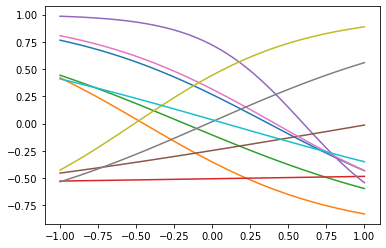

In [102]:
for i in range(10):
  plt.plot(x, np.tanh(x * w[0][i] + b[i]))